<a href="https://colab.research.google.com/github/matician255/NEURAL-NETWORK-FLASHCARDS/blob/main/Transformer_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1 - Positional encoding visualizations

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



"""
This function creates position-aware number patterns (positional encodings) used
 in AI models like Transformers.These patterns help the model understand the
 order of elements in a sequence (e.g., words in a sentence) or to
 give the network information about the position of each token or pixel in a sequence
 The numerator of the positional encoding formular Generates a list of
 positions: [0, 1, 2, ..., positions-1]
 The denominator Creates a "scaling" factor that decreases exponentially with
  higher dimensions. Why? To ensure lower dimensions change faster
  (capturing short-range patterns) and higher dimensions change
   slower (capturing long-range patterns).

"""



def positional_encoding(positions, d):
    """
    Precomputes a matrix with all the positional encodings

    Arguments:
        positions (int) -- Maximum number of positions to be encoded or in simple
        language: Maximum length of a sequence (e.g., 100 words).

        d (int) -- Size of the encoding vector (e.g., 512 dimensions) in each position.
        (i.e., the number of features in each positional encoding).

    Returns:
        pos_encoding -- (1, position, d_model) A matrix with the positional encodings
    """

    # initialize a matrix angle_rads of all the angles
    angle_rads = np.arange(positions)[:, np.newaxis] / np.power(10000, (2 * (np.arange(d)[np.newaxis, :]//2)) / np.float32(d))
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    # Reshapes the matrix to (1, positions, d) for compatibility with neural networks.
    #Converts the result to a TensorFlow tensor.
    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)
   # This matrix holds a unique "angle" for every combination of position and dimension.

  # code explanation
  # np.arange(positions)[:, np.newaxis]:

  # np.arange(positions) creates a list of integers [0, 1, 2, ..., positions-1].

  # [:, np.newaxis] reshapes this into a column vector of shape (positions, 1).

  # Interpretation: Each row represents a position in the sequence.
"""Uses sine for even dimensions and cosine for odd dimensions.
    Why? This alternation allows the model to learn relative positions
    (e.g., "word 5 is 3 positions away from word 2")."""


'Uses sine for even dimensions and cosine for odd dimensions.\n    Why? This alternation allows the model to learn relative positions \n    (e.g., "word 5 is 3 positions away from word 2").'

Summary in Simple Language
Creating Positions and Dimensions:
The function creates a matrix where each row represents a unique position (from 0 to positions - 1) and each column represents a dimension of the encoding (0 to d - 1).

Assigning Frequencies:
Each position is divided by a number that depends on the dimension. The result is a matrix of "angles".

Sine and Cosine Transformation:
These angles are then transformed using sine for even columns and cosine for odd columns. This gives every position a unique pattern that a model can learn.

Reshape for Compatibility:
The matrix is reshaped to have an extra first dimension (making it (1, positions, d)) so that it can be easily added to other tensors in a batch.

Convert to Tensor:
Finally, it converts the NumPy array to a TensorFlow tensor of type float32 for model training.

This positional encoding allows a model to know the order of the input data, which is crucial for tasks involving sequences or images, like in Transformers.

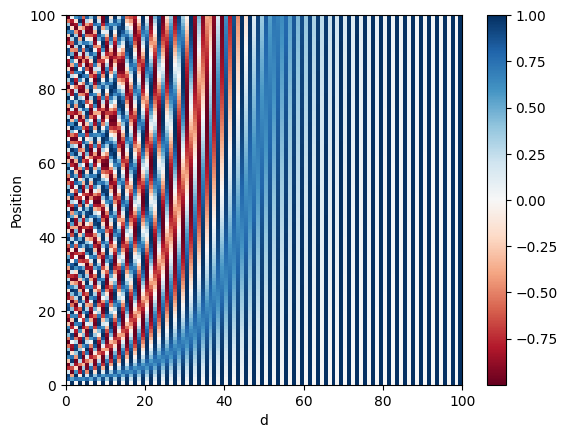

In [4]:
EMBEDDING_DIM = 100
MAX_SEQUENCE_LENGTH = 100
MAX_NB_WORDS = 64
pos_encoding = positional_encoding(MAX_SEQUENCE_LENGTH, EMBEDDING_DIM)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('d')
plt.xlim((0, EMBEDDING_DIM))
plt.ylabel('Position')
plt.colorbar()
plt.show()

#pos_encoding[0] gives you the shape (100, 100) → 100 positions, each with a 100-d vector
#plt.pcolormesh(...) uses colors to show how values vary across dimensions and positions



Each word in a sentence appears at a specific position — and Transformers need
to know that. So we create a different vector for each position (like a fingerprint) that helps the model remember where each word is in the sequence.



*  Think of each positional vector as an arrow drawn from the origin. Even though each arrow points in a slightly different direction (depending on the position), every arrow is always the same length (7.071068).
*   when comparing two positional encoding vectors, the result (their correlation) is influenced only by how similar their directions are, not by differences in their lengths.
In practical terms, it ensures that the encoding focuses on positional differences (angles) rather than the scale of the values. This stability is beneficial in mechanisms like attention, where relative differences (or correlations) between positions are crucial



* Constant Difference Norm Between Positions:

Imagine you have two words at two different positions in a sentence. Their positional encoding is a vector (a list of numbers).

The statement "the norm of the difference between 2 vectors separated by k positions is also constant" means that if you take any two positions that are, say, 10 places apart in the sentence, the "distance" between their positional encoding vectors (measured by the norm) is about the same no matter where you start in the sentence.

In simpler terms:
Whether you compare the encoding for position 1 and position 11, or position 30 and position 40, the difference between these encoding vectors is roughly identical. What matters is the gap—here, 10 positions—not the absolute positions themselves.

* Relative vs. Absolute Positioning:

This property shows that what the encoding captures is the relative difference between positions, not the exact (absolute) position numbers.

This is important because many language tasks benefit more from knowing how far apart words are, rather than knowing their exact positions in a sentence.

Linear Relationships Between Positional Encodings:

The positional encodings are designed so that you can relate one encoding to another through a simple linear transformation.

This allows the model to better focus on the differences between words' positions (the relative positions) rather than being distracted by their large absolute values.

* Keeping Vector Values Small:

It is crucial that the values in these positional encodings remain small. If they were too large, they could "overshadow" or distort the word embeddings (the representations of the words themselves) during processing.

By keeping the values small and the differences consistent, the model can combine the positional information with the word embeddings more effectively, ensuring that neither dominates the other.

1. **What is a Positional Encoding Matrix?**  
For a given sentence (or sequence), each word is assigned a unique vector (a list of numbers).

When you compile all these vectors together, you get a matrix where each row corresponds to a word’s positional encoding.

2. Visualizing Uniqueness and Relative Positions
Uniqueness:  
The matrix lets you see that each position gets a different vector. Even if two words are at different positions, their encodings are different.

Relative Position Representation:
While each vector is unique, what really matters in language is how words relate to each other. For instance, it's often more important to know that one word comes 5 positions after another rather than knowing their absolute positions.

3. Calculating the Correlation Between Vectors
Correlation/Similarity:  
To understand how these vectors capture relative positions, you compute how similar (or correlated) each positional vector is to every other.

You create a new matrix (a correlation matrix) where:

Each element (i, j) is the correlation (for example, the dot product) between the positional vector at position i and the one at position j.

4. What Should a Good Positional Encoder Produce?
Symmetry:  
The correlation matrix should be perfectly symmetric because the similarity between position i and position j should be the same as between j and i.

Main Diagonal:
The highest correlation values should appear along the main diagonal. This makes sense because each vector is maximally correlated with itself.

Away from the Diagonal:
As you move away from the main diagonal (i.e., as the difference between positions increases), the correlation should decrease. This means that the further apart two positions are, the less similar their encoding vectors are.

5. Why This Matters for Relative Positioning
Relative Differences, Not Absolute:
A positional encoder with these properties lets the model focus on the relative separation between words. That is, the model “understands” how far apart the words are without being influenced by their exact numerical values.

Importance in Attention:
In models like Transformers, such correlation measures play an important role in computing attention weights. The model uses the relative difference (or similarity) between positional vectors to decide how much influence one word should have on another.

**Summary**  
Positional Encoding Matrix: A table where each row is a unique vector representing a word's position.

Correlation Matrix: A new matrix showing the similarity between every pair of positional vectors.

It should be symmetric.

Maximum similarity on the diagonal (a vector compared to itself).

Decreasing similarity as the positions get further apart.

Benefit:
This shows that positional encodings capture relative position information in a way that the model can use effectively in calculations like attention, allowing it to focus on the distance between words rather than absolute values.

This is the key idea: by making the dot product of two vectors depend only on their relative positions, the encoding helps the model understand the context in a sentence, emphasizing "how far apart" words are rather than their specific positions.

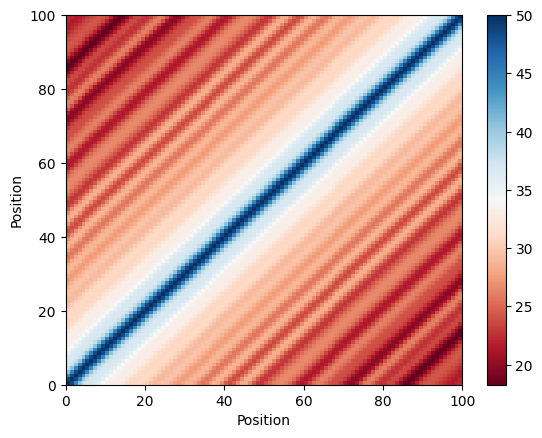

In [5]:
# Positional encoding correlation
corr = tf.matmul(pos_encoding, pos_encoding, transpose_b=True).numpy()[0]
plt.pcolormesh(corr, cmap='RdBu')
plt.xlabel('Position')
plt.xlim((0, MAX_SEQUENCE_LENGTH))
plt.ylabel('Position')
plt.colorbar()
plt.show()

What you should remember:

Positional encodings can be expressed as linear functions of each other, which allow the model to learn according to the relative positions of words.
Positional encodings can affect the word embeddings, but if the relative weight of the positional encoding is small, the sum will retain the semantic meaning of the words.